### **CC57 - MACHINE LEARNING - CLASIFICADOR NAIVE BAYES**

# Detección de fraude con tarjetas de crédito


El conjunto de datos contiene transacciones validas y fraudelentas en realizadas con tarjeta de credito.  

Son 9965 observaciones en 31 variables.
Se desconoce los nombres de las variables ( van del V1 al V28), por tanto, no se sabe que valores representan.

El atributo Time representa la hora en cantidad de segundos, por tanto, habra que convertirlo a horas.

La variable Amount contiene el valor de la transaccion y la variable Class es la eqiqueta o variable objetivo (0 = transaccion real, 1= transaccion fraudulenta).

Se solicita lo siguiente:

- Cargar los datos
- Realizar un analisis visual y preprocesamiento de los datos
- Crear un modelo utilizando el clasificador Naive Bayes (GaussianNB) para predecir si una transaccion con TC en genuina o fraudulenta.  

- Visualizar los resultados del modelo
- Evaluar el modelo



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## <font color=blue>0. Cargar Librerias</font>


In [ ]:
#Incluya las principales librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

## <font color=blue>1. Analisis Exploratorio de los Datos</font>


In [ ]:
#Cargar archivo de datos
#data = pd.read_csv("tcredito.csv")
data = pd.read_csv('/content/drive/MyDrive/Septimo Ciclo/Machine Learning/Semana 5/Miercoles/Actividad #3: Clasificacion de Transacciones de TC/tcredito.csv', encoding='latin-1')

In [ ]:
#Visualizar primeros registros del conjunto de datos
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.duplicated().sum()

np.int64(1081)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(283726, 31)

In [ ]:
data.head(-1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


Ventajas:
Agrupa transacciones por hora del día, sin importar en qué día fueron.

El modelo puede detectar patrones como: "entre 2 y 5 AM hay más fraudes", etc.

Esto preserva el patrón temporal, reduce la dimensión temporal innecesaria y evita problemas de sobreajuste por fechas específicas.

In [ ]:
data['Hour'] = (data['Time'] % 86400) / 3600

In [ ]:
data.head(-1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0,23.995833
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.996111
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.996389
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.996667


In [ ]:

cond = data['Hour'].between(0, 24)

dia_1 = data[cond & (data['Time'] < 86400)]
dia_2 = data[cond & (data['Time'] >= 86400)]

print("Día 1 (Time < 86400):", len(dia_1))
print("Día 2 (Time >= 86400):", len(dia_2))


Día 1 (Time < 86400): 144236
Día 2 (Time >= 86400): 139490


In [ ]:
pd.to_timedelta(86401, unit='s')

Timedelta('1 days 00:00:01')

In [ ]:
data['Hour'] = ((data['Time'] % 86400) / 3600).astype(int)


In [ ]:
data.head(-1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0,23
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23


In [ ]:
#data_nueva = data.drop(columns=['Time'])

In [ ]:
data_nueva=data.copy()

In [ ]:
data_nueva.to_csv('data_nueva.csv', index=False)

In [ ]:
pd.read_csv('data_nueva.csv')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23


### **Visualizacion de los atributos de clase reales y fraudulentos**

In [ ]:
v_columns = [f'V{i}' for i in range(1, 29)]

# Separar legítimas y fraudulentas
legit = data_nueva[data_nueva['Class'] == 0].copy()
fraud = data_nueva[data_nueva['Class'] == 1].copy()

# Detectar y eliminar outliers solo en transacciones legítimas
for col in v_columns:
    Q1 = legit[col].quantile(0.25)
    Q3 = legit[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Mantener solo los datos dentro de los límites
    legit = legit[(legit[col] >= lim_inf) & (legit[col] <= lim_sup)]

# Unir los datos limpios
data_filtrada = pd.concat([legit, fraud], ignore_index=True)

print("Tamaño original:", data_nueva.shape)
print("Tamaño después de eliminar outliers en Class 0:", data_filtrada.shape)


Tamaño original: (283726, 32)
Tamaño después de eliminar outliers en Class 0: (120674, 32)


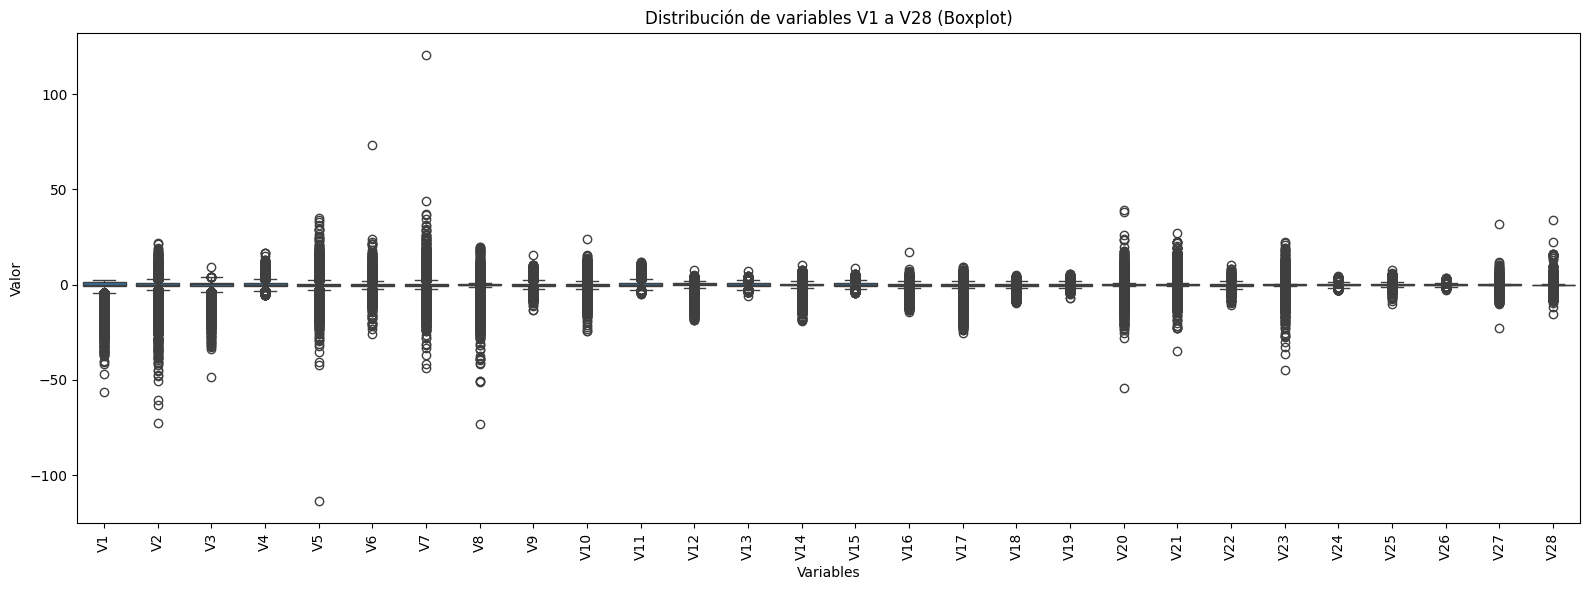

In [ ]:
# Filtrar solo las columnas V1 a V28
columnas_v = [col for col in data_nueva.columns if col.startswith('V')]

# Redimensionar el DataFrame para seaborn
df_v = data_nueva[columnas_v].melt(var_name='Variable', value_name='Valor')

# Crear boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(x='Variable', y='Valor', data=df_v)
plt.xticks(rotation=90)
plt.title('Distribución de variables V1 a V28 (Boxplot)')
plt.xlabel('Variables')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

In [ ]:
v_columns = [f'V{i}' for i in range(1, 29)]
outliers_por_variable = []

n_filas = data_nueva.shape[0]

for col in v_columns:
    Q1 = data_nueva[col].quantile(0.25)
    Q3 = data_nueva[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = data_nueva[(data_nueva[col] < limite_inferior) | (data_nueva[col] > limite_superior)]

    cantidad = len(outliers)
    porcentaje = (cantidad / n_filas) * 100

    outliers_por_variable.append({
        'Variable': col,
        'Outliers': cantidad,
        'Porcentaje (%)': round(porcentaje, 2)
    })

# Mostrar como tabla ordenada
df_outliers = pd.DataFrame(outliers_por_variable).sort_values(by='Outliers', ascending=False)
print(df_outliers)


   Variable  Outliers  Porcentaje (%)
26      V27     38799           13.67
27      V28     30094           10.61
19      V20     27553            9.71
7        V8     23904            8.43
5        V6     22886            8.07
22      V23     18467            6.51
11      V12     15282            5.39
20      V21     14401            5.08
13      V14     14060            4.96
1        V2     13390            4.72
4        V5     12221            4.31
3        V4     11094            3.91
18      V19     10150            3.58
9       V10      9345            3.29
6        V7      8839            3.12
8        V9      8199            2.89
15      V16      8180            2.88
17      V18      7468            2.63
16      V17      7353            2.59
0        V1      6948            2.45
25      V26      5665            2.00
24      V25      5333            1.88
23      V24      4758            1.68
12      V13      3362            1.18
2        V3      3306            1.17
14      V15 

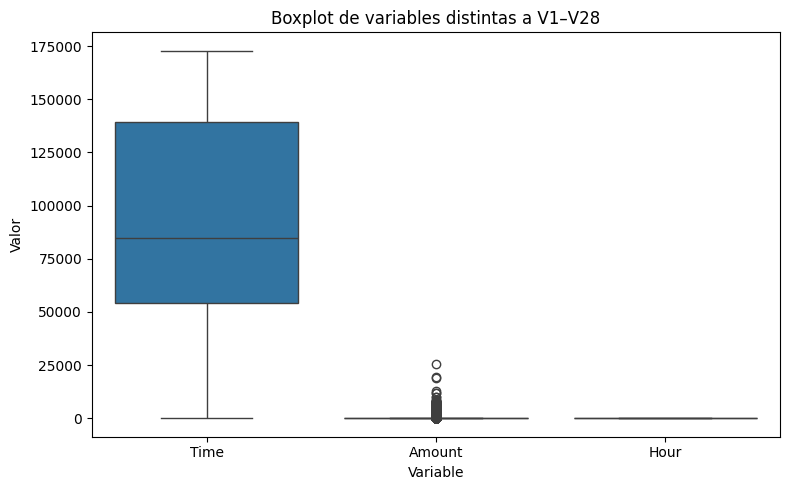

In [ ]:
# Seleccionar columnas que NO sean V1 a V28
otras_columnas = [col for col in data_nueva.columns if not col.startswith('V') and col != 'Class']

# Preparar los datos para seaborn
df_otros = data_nueva[otras_columnas].melt(var_name='Variable', value_name='Valor')

# Graficar boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(x='Variable', y='Valor', data=df_otros)
plt.title('Boxplot de variables distintas a V1–V28')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

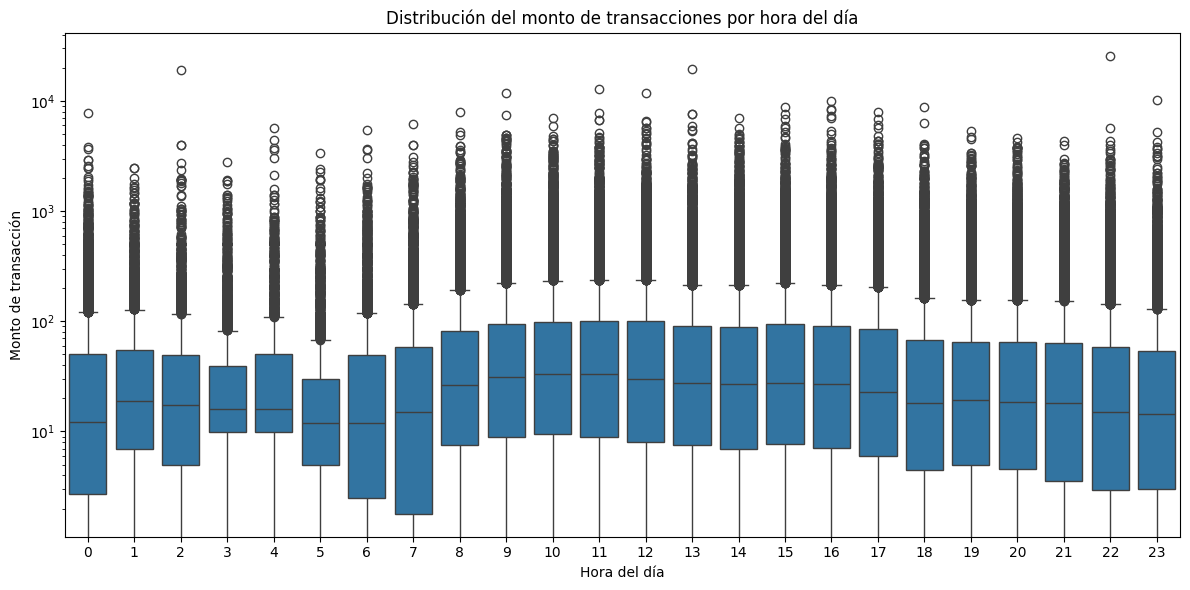

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Amount', data=data_nueva)
plt.title('Distribución del monto de transacciones por hora del día')
plt.yscale('log')
plt.xlabel('Hora del día')
plt.ylabel('Monto de transacción')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [ ]:
data_filtrada.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

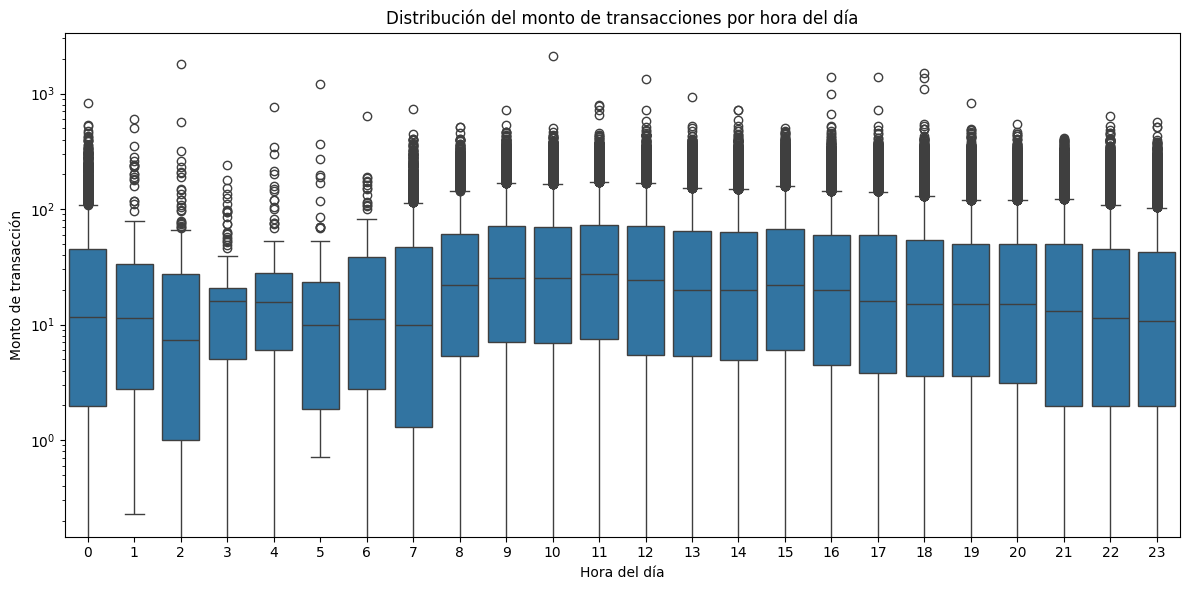

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Amount', data=data_filtrada)
plt.title('Distribución del monto de transacciones por hora del día')
plt.yscale('log')
plt.xlabel('Hora del día')
plt.ylabel('Monto de transacción')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [ ]:
# Configuración de estilo
sns.set(style="whitegrid")

<ipython-input-38-7e138e606c25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data_nueva, palette='pastel')


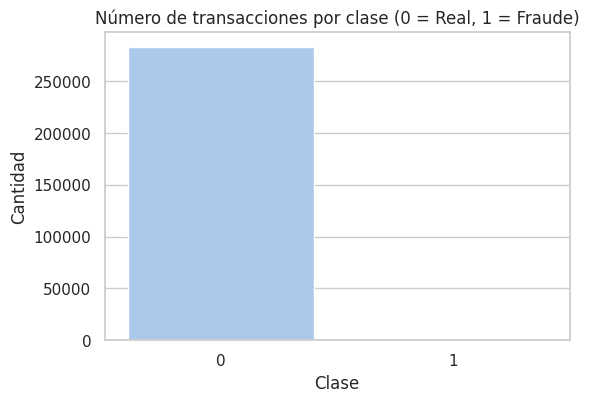

In [ ]:
# Conteo de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data_nueva, palette='pastel')
plt.title('Número de transacciones por clase (0 = Real, 1 = Fraude)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

<ipython-input-39-76a691c39a0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data_filtrada, palette='pastel')


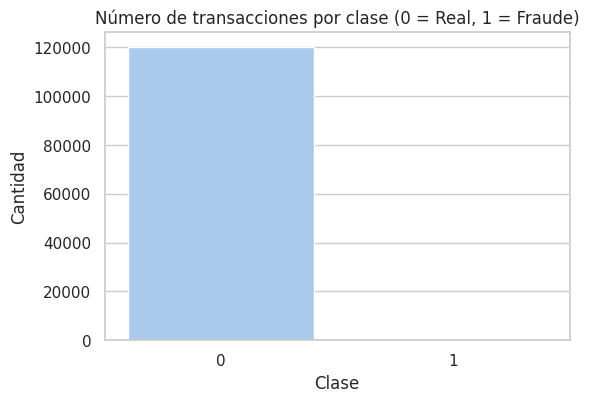

In [ ]:
# Conteo de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data_filtrada, palette='pastel')
plt.title('Número de transacciones por clase (0 = Real, 1 = Fraude)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

<ipython-input-40-e43b72e086a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data_nueva, palette='Set2', showfliers=False)


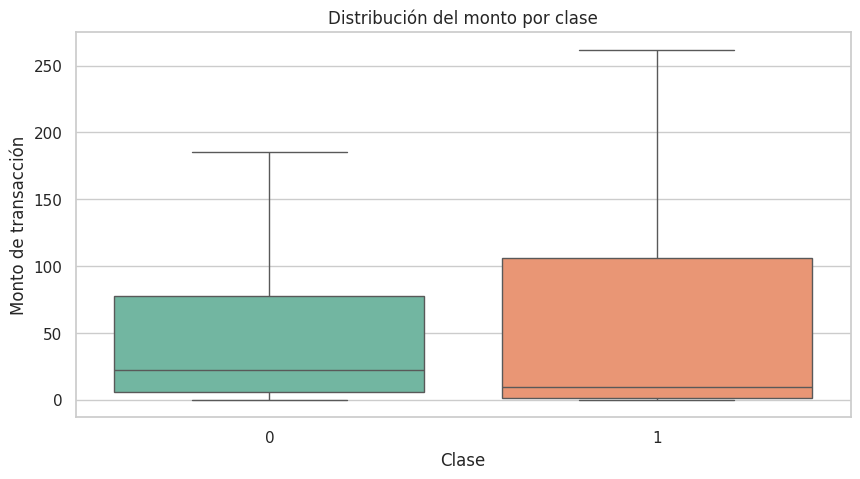

In [ ]:
# Distribución de montos por clase
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=data_nueva, palette='Set2', showfliers=False)
plt.title('Distribución del monto por clase')
plt.xlabel('Clase')
plt.ylabel('Monto de transacción')
plt.show()

<ipython-input-41-68b441ffa4b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=data_filtrada, palette='Set2', showfliers=False)


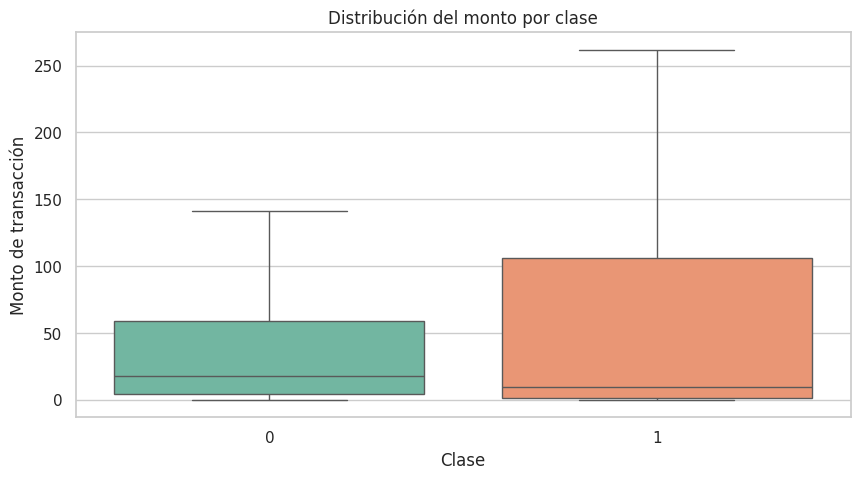

In [ ]:
# Distribución de montos por clase
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=data_filtrada, palette='Set2', showfliers=False)
plt.title('Distribución del monto por clase')
plt.xlabel('Clase')
plt.ylabel('Monto de transacción')
plt.show()

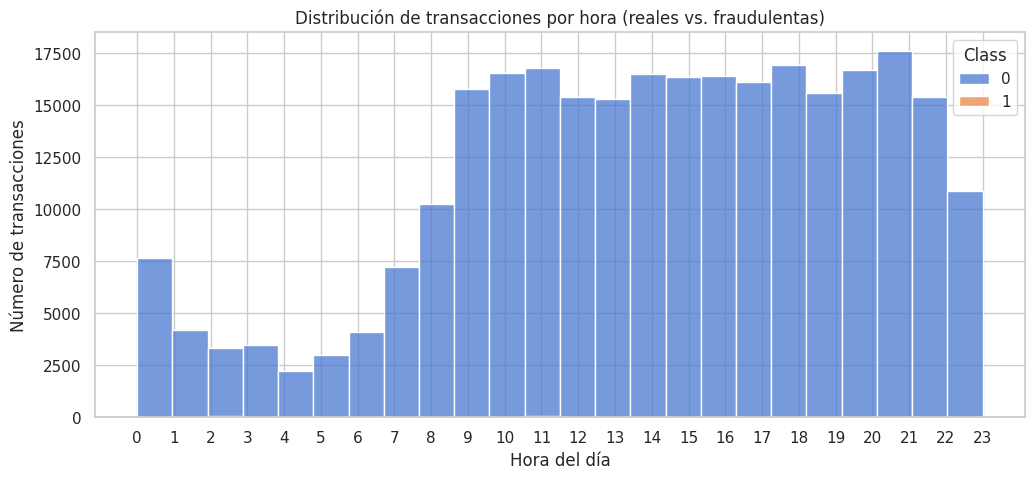

In [ ]:
# Distribución por hora del día, separado por clase
plt.figure(figsize=(12, 5))
sns.histplot(data=data_nueva, x='Hour', hue='Class', bins=24, multiple='stack', palette='muted')
plt.title('Distribución de transacciones por hora (reales vs. fraudulentas)')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones')
plt.xticks(range(0, 24))
plt.show()

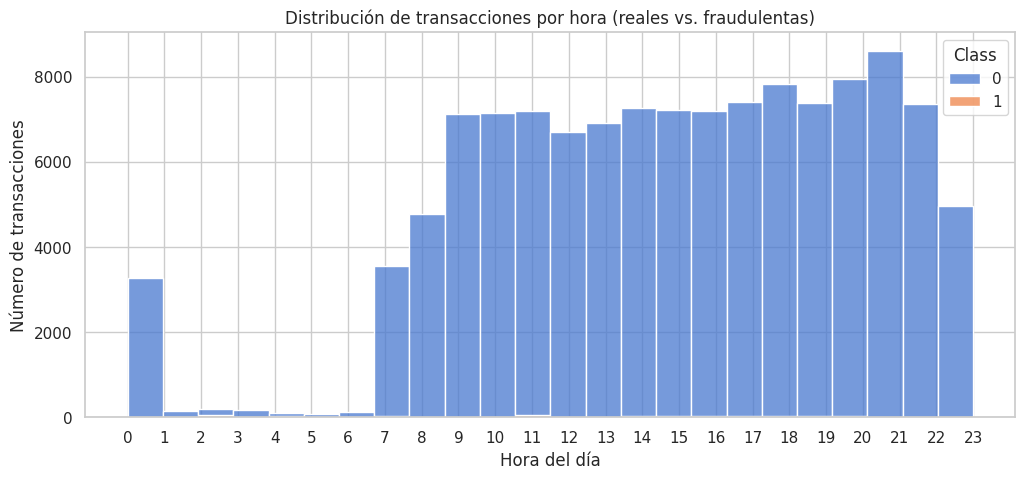

In [ ]:
# Distribución por hora del día, separado por clase
plt.figure(figsize=(12, 5))
sns.histplot(data=data_filtrada, x='Hour', hue='Class', bins=24, multiple='stack', palette='muted')
plt.title('Distribución de transacciones por hora (reales vs. fraudulentas)')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones')
plt.xticks(range(0, 24))
plt.show()

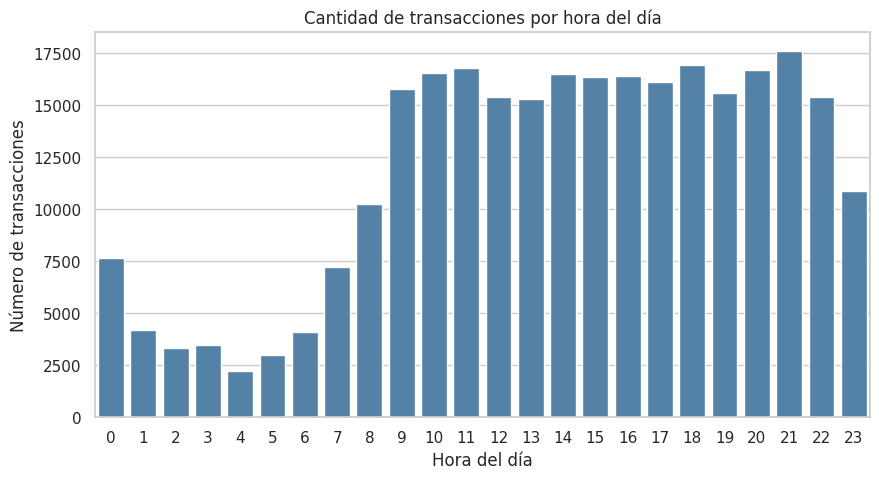

In [ ]:
#Visualizar las transacciones por hora del dia
# Agrupar y contar transacciones por hora
transacciones_por_hora = data_nueva['Hour'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 5))
sns.barplot(x=transacciones_por_hora.index, y=transacciones_por_hora.values, color='steelblue')
plt.title('Cantidad de transacciones por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones')
plt.xticks(range(0, 24))
plt.show()

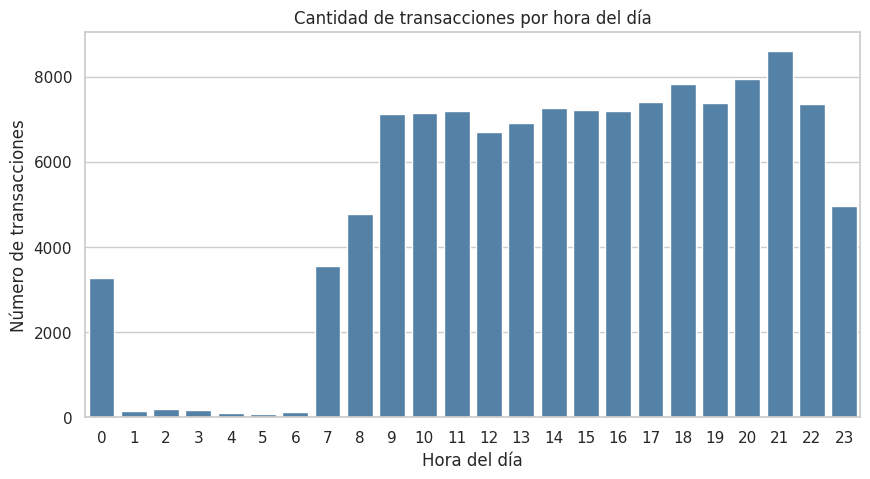

In [ ]:
#Visualizar las transacciones por hora del dia
# Agrupar y contar transacciones por hora
transacciones_por_hora = data_filtrada['Hour'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 5))
sns.barplot(x=transacciones_por_hora.index, y=transacciones_por_hora.values, color='steelblue')
plt.title('Cantidad de transacciones por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de transacciones')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
conteo_clases = data_nueva['Class'].value_counts()
print(conteo_clases)

Class
0    283253
1       473
Name: count, dtype: int64


In [ ]:
conteo_clases_filtrada = data_filtrada['Class'].value_counts()
print(conteo_clases_filtrada)

Class
0    120201
1       473
Name: count, dtype: int64


In [ ]:
porcentaje_fraude = (conteo_clases[1] / conteo_clases.sum()) * 100
print(f"Porcentaje de transacciones fraudulentas: {porcentaje_fraude:.4f}%")


Porcentaje de transacciones fraudulentas: 0.1667%


In [ ]:
porcentaje_fraude = (conteo_clases_filtrada[1] / conteo_clases_filtrada.sum()) * 100
print(f"Porcentaje de transacciones fraudulentas: {porcentaje_fraude:.4f}%")


Porcentaje de transacciones fraudulentas: 0.3920%


In [ ]:
# Filtrar solo las transacciones fraudulentas
fraudes = data_nueva[data_nueva['Class'] == 1]

# Contar fraudes por hora
fraudes_por_hora = fraudes['Hour'].astype(int).value_counts().sort_index()

# Mostrar
print(fraudes_por_hora)

Hour
0      6
1     10
2     48
3     17
4     23
5     11
6      9
7     23
8      9
9     16
10     8
11    53
12    17
13    17
14    23
15    26
16    22
17    28
18    28
19    19
20    18
21    16
22     9
23    17
Name: count, dtype: int64


In [ ]:
# Filtrar solo las transacciones fraudulentas
fraudes = data_filtrada[data_filtrada['Class'] == 1]

# Contar fraudes por hora
fraudes_por_hora = fraudes['Hour'].astype(int).value_counts().sort_index()

# Mostrar
print(fraudes_por_hora)

Hour
0      6
1     10
2     48
3     17
4     23
5     11
6      9
7     23
8      9
9     16
10     8
11    53
12    17
13    17
14    23
15    26
16    22
17    28
18    28
19    19
20    18
21    16
22     9
23    17
Name: count, dtype: int64


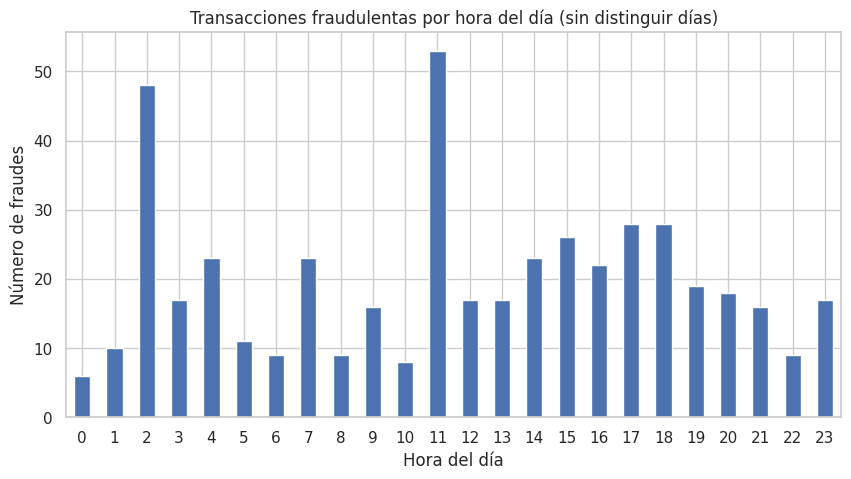

In [ ]:
fraudes_por_hora.plot(kind='bar', figsize=(10, 5))
plt.title('Transacciones fraudulentas por hora del día (sin distinguir días)')
plt.xlabel('Hora del día')
plt.ylabel('Número de fraudes')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## <font color=blue>2. Preprocesamiento de los datos</font>

### **Verificar datos faltantes y/o duplicados**

In [ ]:
data_nueva.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data_filtrada.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data_nueva.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

In [ ]:
data_filtrada.duplicated().sum()

np.int64(0)

In [ ]:
data_nueva.duplicated().sum()

np.int64(0)

In [ ]:
todos_duplicados = data_nueva[data_nueva.duplicated(keep=False)]
print(todos_duplicados)


Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class, Hour]
Index: []

[0 rows x 32 columns]


### **Separar variables predictoras y el atributo destino de los datos**

In [ ]:
y = data_nueva['Class']

In [ ]:
y_filtrada=data_filtrada['Class']

In [ ]:
X = data_nueva.drop(columns=['Class'])

In [ ]:
X_filtrada = data_filtrada.drop(columns=['Class'])

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X_filtrada.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
3,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
4,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
y_filtrada.head()

,Class
0,0
1,0
2,0
3,0
4,0


### **Seleccionar las 10 mejores características para construir modelos**

Utilizar:

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

1) f_classif: Usa la prueba ANOVA F (análisis de varianza) para ver qué tan linealmente relacionadas están las variables independientes con la variable objetivo.

- Es útil cuando las variables numéricas tienen una distribución más normal.

2) mutual_info_classif: Mide la información mutua, es decir, cuánta información compartida hay entre cada variable y la clase.

- Captura relaciones no lineales también.

Ambas te permiten encontrar las variables más importantes para predecir Class (fraude vs no fraude).

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [ ]:
# Para Data Nueva
# F-test (ANOVA)
selector_f_nueva = SelectKBest(score_func=f_classif, k=10)
selector_f_nueva.fit(X, y)
scores_f_nueva = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector_f_nueva.scores_
}).sort_values(by='F_Score', ascending=False)

print("Top 10 (f_classif) - data_nueva:")
print(scores_f_nueva.head(10))

# Mutual Information
selector_mi_nueva = SelectKBest(score_func=mutual_info_classif, k=10)
selector_mi_nueva.fit(X, y)
scores_mi_nueva = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Info': selector_mi_nueva.scores_
}).sort_values(by='Mutual_Info', ascending=False)

print("\nTop 10 (mutual_info_classif) - data_nueva:")
print(scores_mi_nueva.head(10))

Top 10 (f_classif) - data_nueva:
   Feature       F_Score
17     V17  30923.969703
14     V14  26719.606942
12     V12  19029.929570
10     V10  12697.850513
16     V16  10302.274423
3       V3   9755.675863
7       V7   8685.536141
11     V11   6447.910427
4       V4   4826.048761
18     V18   3183.658090

Top 10 (mutual_info_classif) - data_nueva:
   Feature  Mutual_Info
17     V17     0.007873
14     V14     0.007746
12     V12     0.007220
10     V10     0.007150
11     V11     0.006450
16     V16     0.005752
4       V4     0.004587
3       V3     0.004583
18     V18     0.003875
9       V9     0.003854


In [ ]:
  # Para Data Filtrada
  # F-test (ANOVA)
  selector_f_filtrada = SelectKBest(score_func=f_classif, k=10)
  selector_f_filtrada.fit(X_filtrada, y_filtrada)
  scores_f_filtrada = pd.DataFrame({
      'Feature': X_filtrada.columns,
      'F_Score': selector_f_filtrada.scores_
  }).sort_values(by='F_Score', ascending=False)

  print("Top 10 (f_classif) - data_filtrada:")
  print(scores_f_filtrada.head(10))

  # Mutual Information
  selector_mi_filtrada = SelectKBest(score_func=mutual_info_classif, k=10)
  selector_mi_filtrada.fit(X_filtrada, y_filtrada)
  scores_mi_filtrada = pd.DataFrame({
      'Feature': X_filtrada.columns,
      'Mutual_Info': selector_mi_filtrada.scores_
  }).sort_values(by='Mutual_Info', ascending=False)

  print("\nTop 10 (mutual_info_classif) - data_filtrada:")
  print(scores_mi_filtrada.head(10))

Top 10 (f_classif) - data_filtrada:
   Feature       F_Score
14     V14  55407.878068
17     V17  40825.474262
12     V12  37591.035514
10     V10  31123.071780
7       V7  21333.113606
16     V16  17188.606968
3       V3  14030.948314
1       V1   9881.546868
2       V2   9214.096955
4       V4   8765.421939

Top 10 (mutual_info_classif) - data_filtrada:
   Feature  Mutual_Info
14     V14     0.021345
17     V17     0.020522
10     V10     0.020264
12     V12     0.020198
27     V27     0.017900
16     V16     0.017378
4       V4     0.016729
28     V28     0.016537
3       V3     0.016533
11     V11     0.016323


## Visualización de las mejores y malas características

## Data nueva

<ipython-input-79-e47b74cd2720>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='F_Score', data=scores_f_nueva.head(10), palette='crest')


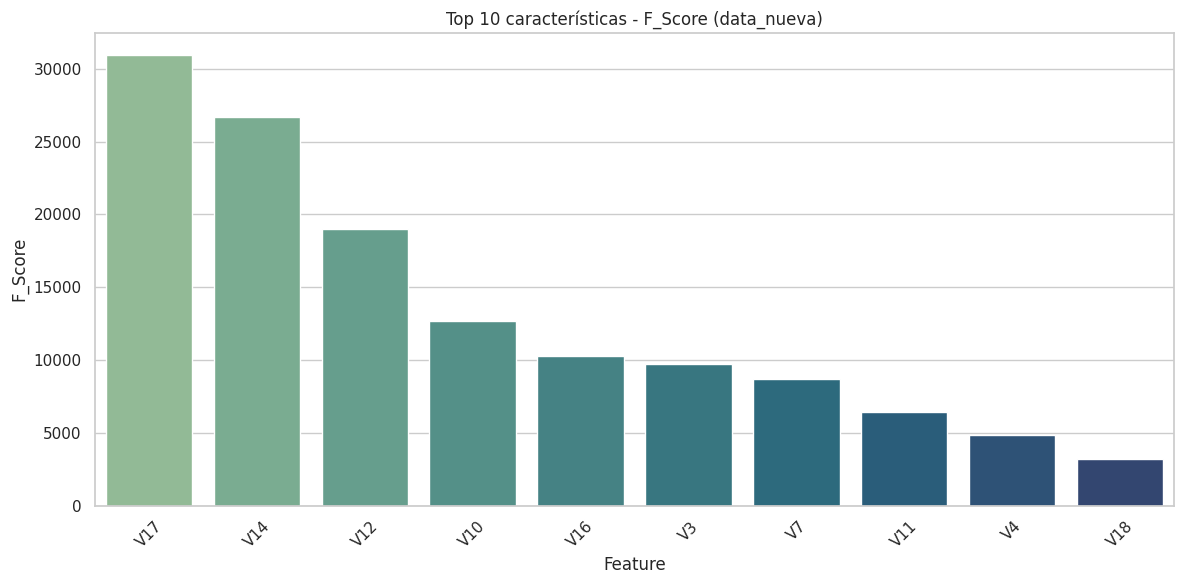

In [ ]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='F_Score', data=scores_f_nueva.head(10), palette='crest')
plt.title('Top 10 características - F_Score (data_nueva)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-80-cbeec343c60d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='F_Score', data=scores_f_nueva.iloc[10:], palette='crest')


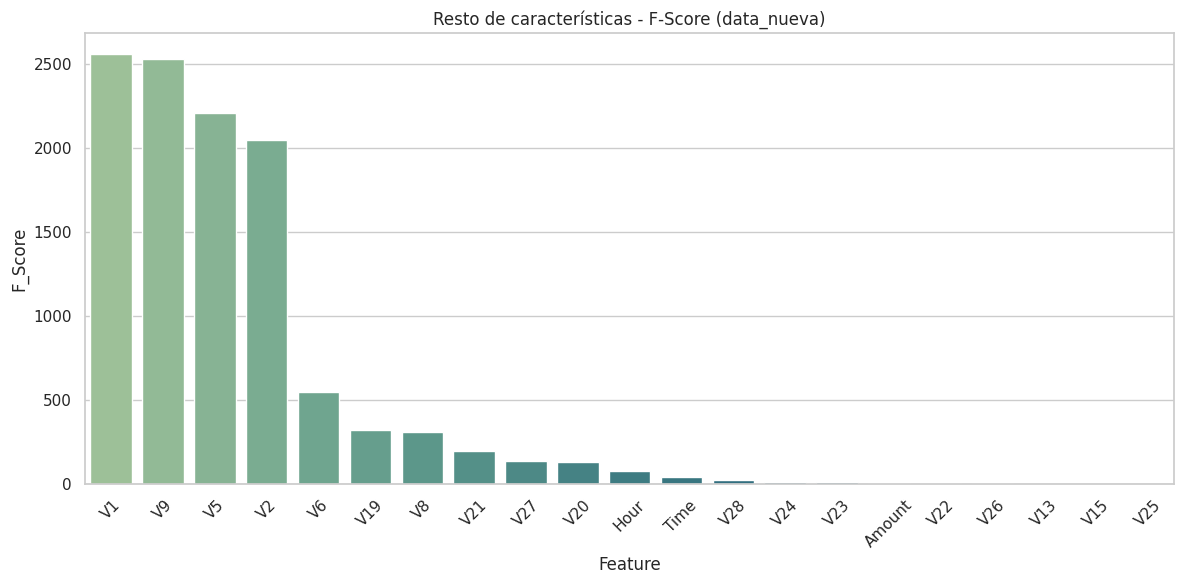

In [ ]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='F_Score', data=scores_f_nueva.iloc[10:], palette='crest')
plt.title('Resto de características - F-Score (data_nueva)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-81-32c03072e91d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Mutual_Info', data=scores_mi_nueva.head(10), palette='crest')


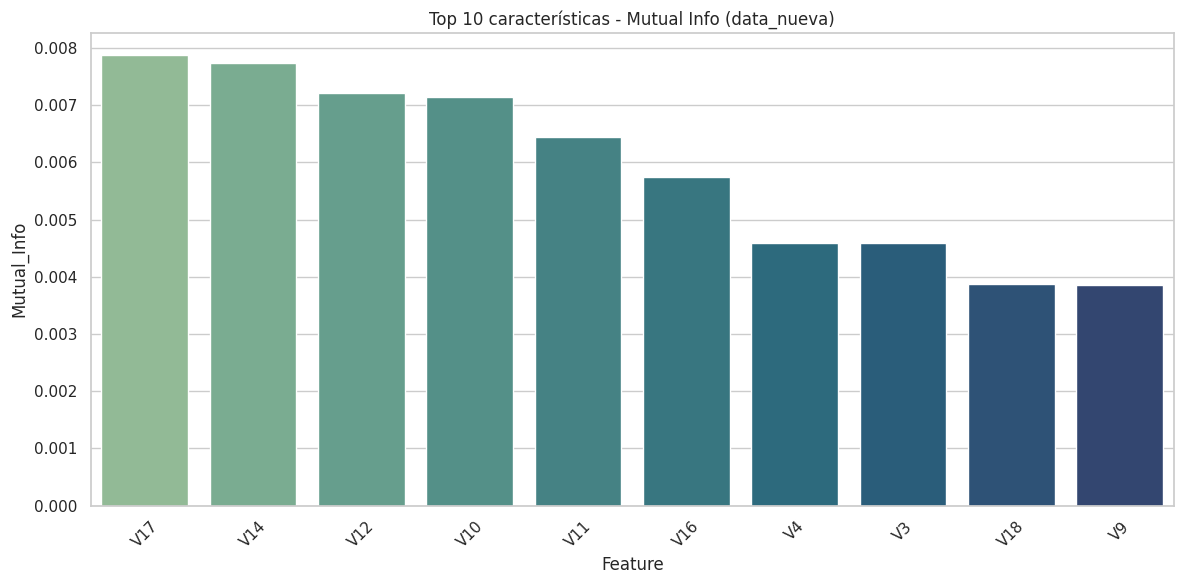

In [ ]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Mutual_Info', data=scores_mi_nueva.head(10), palette='crest')
plt.title('Top 10 características - Mutual Info (data_nueva)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-82-e779fa38b021>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Mutual_Info', data=scores_mi_nueva.iloc[10:], palette='crest')


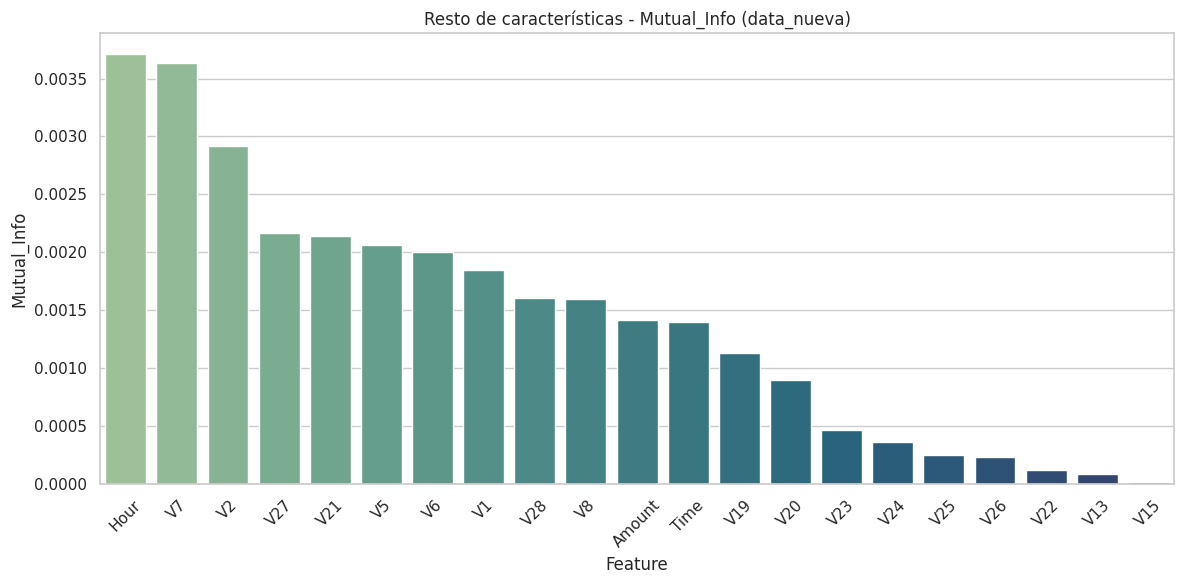

In [ ]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Mutual_Info', data=scores_mi_nueva.iloc[10:], palette='crest')
plt.title('Resto de características - Mutual_Info (data_nueva)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data preparada

<ipython-input-83-636d151825b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='F_Score', data=scores_f_filtrada.head(10), palette='crest')


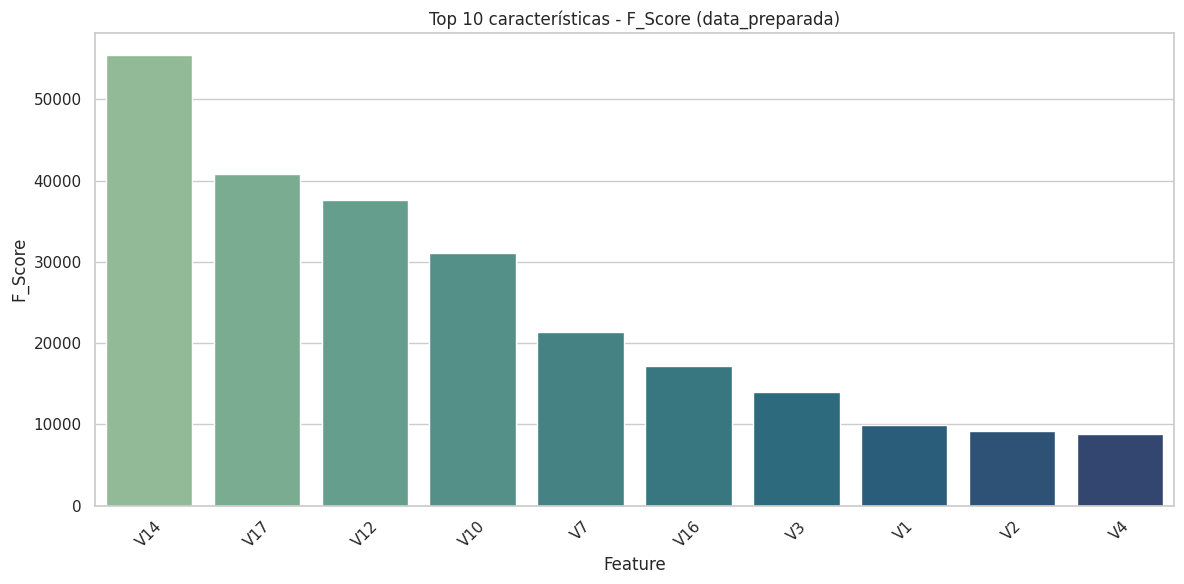

In [ ]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='F_Score', data=scores_f_filtrada.head(10), palette='crest')
plt.title('Top 10 características - F_Score (data_preparada)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-84-4f2e0464a238>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='F_Score', data=scores_f_filtrada.iloc[10:], palette='crest')


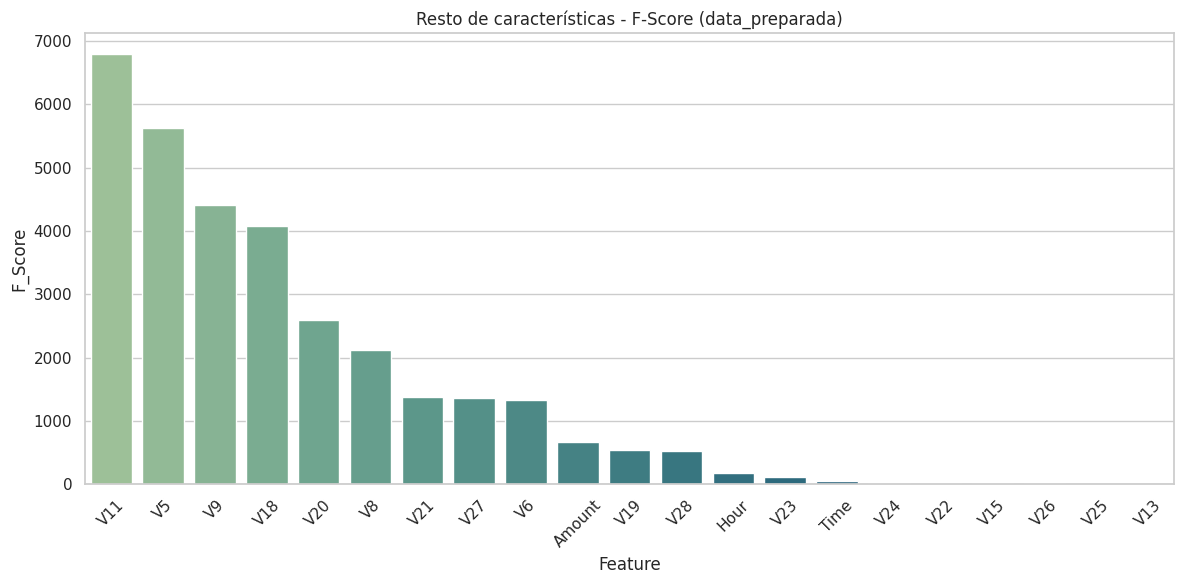

In [ ]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='F_Score', data=scores_f_filtrada.iloc[10:], palette='crest')
plt.title('Resto de características - F-Score (data_preparada)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-85-5432a4430c36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Mutual_Info', data=scores_mi_filtrada.head(10), palette='crest')


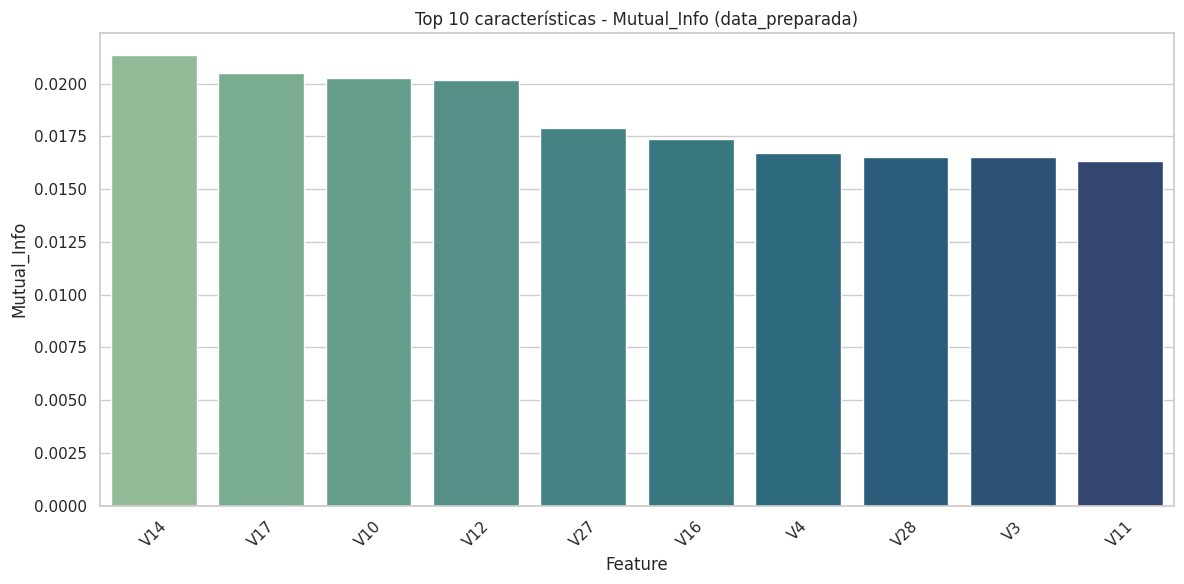

In [ ]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Mutual_Info', data=scores_mi_filtrada.head(10), palette='crest')
plt.title('Top 10 características - Mutual_Info (data_preparada)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-86-b49f2bfc949c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Mutual_Info', data=scores_mi_filtrada.iloc[10:], palette='crest')


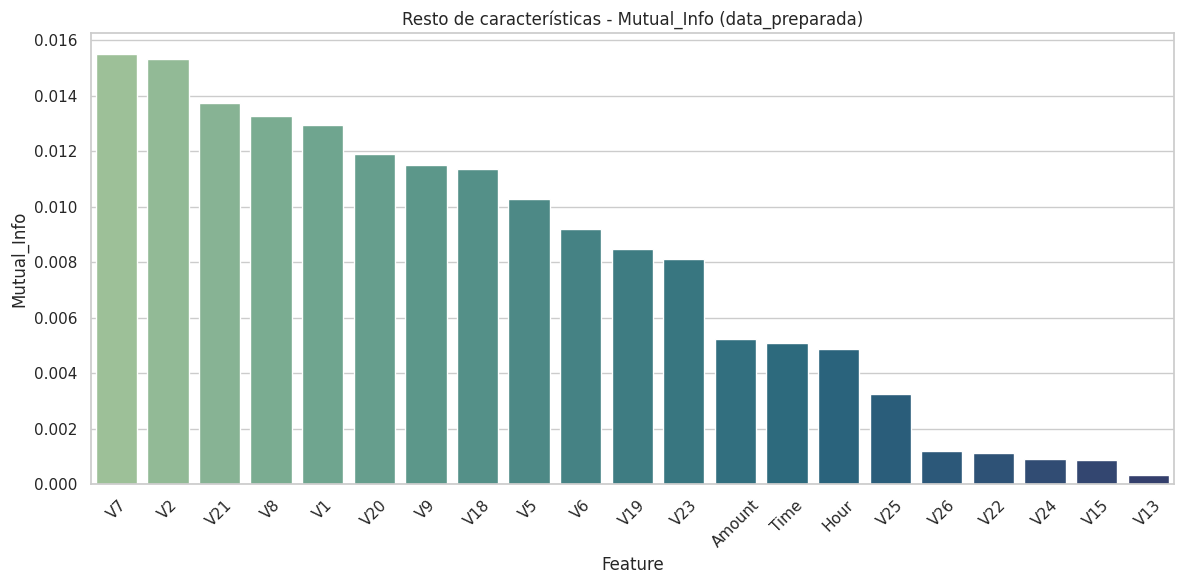

In [ ]:
# Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Mutual_Info', data=scores_mi_filtrada.iloc[10:], palette='crest')
plt.title('Resto de características - Mutual_Info (data_preparada)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## <font color=blue>3. Entrenando el modelo </font>

### **Dividir el conjunto de datos en una proporción de 80: 20**

In [ ]:
from sklearn.model_selection import train_test_split

# Data Nueva

In [ ]:
# Tomar las 10 variables del top de f_classif
top_features_f_nueva = scores_f_nueva['Feature'].head(10).tolist()

In [ ]:
# Subset del dataset solo con esas features
X_top_f_nueva = X[top_features_f_nueva]

In [ ]:
X_train_nueva, X_test_nueva, y_train_nueva, y_test_nueva = train_test_split(X_top_f_nueva, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("Data nueva:")
print("Tamaño del conjunto de entrenamiento:", X_train_nueva.shape)
print("Tamaño del conjunto de prueba:", X_test_nueva.shape)

Data nueva:
Tamaño del conjunto de entrenamiento: (226980, 10)
Tamaño del conjunto de prueba: (56746, 10)


In [ ]:
X_top_f_nueva.head()

,V17,V14,V12,V10,V16,V3,V7,V11,V4,V18
0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,2.536347,0.239599,-0.551600,1.378155,0.025791
1,-0.114805,-0.143772,1.065235,-0.166974,0.463917,0.166480,-0.078803,1.612727,0.448154,-0.183361
2,1.109969,-0.165946,0.066084,0.207643,-2.890083,1.773209,0.791461,0.624501,0.379780,-0.121359
3,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,1.792993,0.237609,-0.226487,-0.863291,1.965775
4,-0.237033,-1.119670,0.538196,0.753074,-0.451449,1.548718,0.592941,-0.822843,0.403034,-0.038195


# Data Filtrada

In [ ]:
# Tomar las 10 variables del top de f_classif
top_features_f = scores_f_filtrada['Feature'].head(10).tolist()

In [ ]:
# Subset del dataset solo con esas features
X_top_f = X_filtrada[top_features_f]

In [ ]:
# División 80% entrenamiento - 20% prueba
X_train_filtrada, X_test_filtrada, y_train_filtrada, y_test_filtrada = train_test_split(X_top_f, y_filtrada, test_size=0.2, random_state=42, stratify=y_filtrada)

In [ ]:
print("\nData filtrada:")
print("Tamaño del conjunto de entrenamiento:", X_train_filtrada.shape)
print("Tamaño del conjunto de prueba:", X_test_filtrada.shape)


Data filtrada:
Tamaño del conjunto de entrenamiento: (96539, 10)
Tamaño del conjunto de prueba: (24135, 10)


In [ ]:
X_top_f.head()

,V14,V17,V12,V10,V7,V16,V3,V1,V2,V4
0,-0.311169,0.207971,-0.617801,0.090794,0.239599,-0.470401,2.536347,-1.359807,-0.072781,1.378155
1,-0.143772,-0.114805,1.065235,-0.166974,-0.078803,0.463917,0.166480,1.191857,0.266151,0.448154
2,-0.137134,-0.058133,0.359894,-0.371407,0.476201,0.401726,1.141109,-0.425966,0.960523,-0.168252
3,0.167372,0.002821,-0.153826,-0.099254,-0.005159,-0.443587,0.045371,1.229658,0.141004,1.202613
4,-0.443523,-0.540980,0.836390,-0.366846,0.651583,0.739453,1.044367,-0.338262,1.119593,-0.222187


### Validación cruzada de los datos de entrenamiento

Debido a que los datos están muy desequilibrados, utilizaremos validación cruzada.
* Dividir el conjunto de datos en conjuntos de datos de entrenamiento y prueba.
* Entrene el modelo usando un conjunto de datos de entrenamiento.
* Pruebe el modelo en el conjunto de datos de prueba.

# Naive Bayes

## Data Nueva

In [ ]:
from sklearn.model_selection import train_test_split #Parte la data 80/20 entrenamiento
from sklearn.model_selection import KFold #Crear los subgrupos(folds)
from sklearn.model_selection import cross_val_score#Valdiacion cruzada
from sklearn.naive_bayes import GaussianNB #Libreria probabilidad

In [ ]:
# Crear el modelo Naive Bayes
models = []
models.append(('Naive Bayes', GaussianNB()))

# Lista para almacenar los resultados y nombres de los modelos
results = []
names = []

In [ ]:
# Validación cruzada con KFold (10 pliegues)
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)  # Dividir en 10 pliegues aleatorios
    cv_results = cross_val_score(model, X_train_nueva, y_train_nueva, cv=kfold, scoring='accuracy')  # Calculando accuracy
    results.append(cv_results)
    names.append(name)

# Mostrar los resultados del modelo
for i in range(len(names)):
    print(f'{names[i]} - Accuracy media: {results[i].mean()}')

Naive Bayes - Accuracy media: 0.9908670367433254


In [ ]:
print(results)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
naive=GaussianNB()
naive.fit(X_train_nueva,y_train_nueva)
naive_predics =naive.predict(X_test_nueva)
print(accuracy_score(y_test_nueva,naive_predics))
print(classification_report(y_test_nueva,naive_predics))


0.9897261480985444
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.12      0.81      0.21        95

    accuracy                           0.99     56746
   macro avg       0.56      0.90      0.60     56746
weighted avg       1.00      0.99      0.99     56746



## Data preparada


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold

In [ ]:
# Crear modelo Naive Bayes
nb_model = GaussianNB()

# Definir validación cruzada estratificada para clases desequilibradas
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


# Evaluar con validación cruzada en los datos de entrenamiento
cv_results = cross_validate(
    nb_model,
    X_train_filtrada,
    y_train_filtrada,
    cv=cv,
    return_train_score=True,
    return_estimator=True,
    scoring='accuracy'
)

# Mostrar los resultados por fold
print("Puntajes de entrenamiento:", cv_results['train_score'])
print("Puntajes de validación:", cv_results['test_score'])

Puntajes de entrenamiento: [0.99955113 0.99957415 0.99958566 0.99953962 0.99957415 0.99958566
 0.99955113 0.99956264 0.99955113 0.99957415]
Puntajes de validación: [0.99968925 0.99948208 0.9993785  0.99979283 0.99948208 0.9993785
 0.99968925 0.99958566 0.99968925 0.99948203]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Se selecciona la iteración con train_score máximo para el modelo de entrenamiento.

# Obtener índice del mejor modelo (basado en train_score)
best_index = np.argmax(cv_results['train_score'])
best_model = cv_results['estimator'][best_index]

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test_filtrada)

print("Reporte en el conjunto de prueba (modelo con mejor rendimiento en entrenamiento):")
print(classification_report(y_test_filtrada, y_pred))


Reporte en el conjunto de prueba (modelo con mejor rendimiento en entrenamiento):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24040
           1       1.00      0.86      0.93        95

    accuracy                           1.00     24135
   macro avg       1.00      0.93      0.96     24135
weighted avg       1.00      1.00      1.00     24135



# Ramdon Forest Classifiers

# Data nueva


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

In [ ]:
# 1. Seleccionar las 10 mejores características con f_classif
selector_f_nueva = SelectKBest(score_func=f_classif, k=10)
selector_f_nueva.fit(X, y)

scores_f_nueva = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector_f_nueva.scores_
}).sort_values(by='F_Score', ascending=False)

top_features_f_nueva = scores_f_nueva['Feature'].head(10).tolist()

In [ ]:
X_top_f_nueva = X[top_features_f_nueva]

In [ ]:
X_train_nueva, X_test_nueva, y_train_nueva, y_test_nueva = train_test_split(
    X_top_f_nueva, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño del conjunto de entrenamiento:", X_train_nueva.shape)
print("Tamaño del conjunto de prueba:", X_test_nueva.shape)


Tamaño del conjunto de entrenamiento: (226980, 10)
Tamaño del conjunto de prueba: (56746, 10)


In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_nueva, y_train_nueva)


RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y_pred_nueva = clf.predict(X_test_nueva)

In [ ]:
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test_nueva, y_pred_nueva))

print("\nReporte de Clasificación:")
print(classification_report(y_test_nueva, y_pred_nueva))

print("Precisión (accuracy):", accuracy_score(y_test_nueva, y_pred_nueva))


Matriz de Confusión:
[[56646     5]
 [   25    70]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.74      0.82        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Precisión (accuracy): 0.9994713283755683


# Data preparada

In [ ]:
# 1. Seleccionar las 10 mejores características con f_classif
selector_f_filtrada = SelectKBest(score_func=f_classif, k=10)
selector_f_filtrada.fit(X, y)

scores_f_nueva = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector_f_filtrada.scores_
}).sort_values(by='F_Score', ascending=False)

top_features_f = scores_f_filtrada['Feature'].head(10).tolist()

In [ ]:

X_top_f = X_filtrada[top_features_f]

In [ ]:
X_train_filtrada, X_test_filtrada, y_train_filtrada, y_test_filtrada = train_test_split(X_top_f, y_filtrada, test_size=0.2, random_state=42, stratify=y_filtrada)

print("Tamaño del conjunto de entrenamiento:", X_train_filtrada.shape)
print("Tamaño del conjunto de prueba:", X_test_filtrada.shape)


Tamaño del conjunto de entrenamiento: (96539, 10)
Tamaño del conjunto de prueba: (24135, 10)


In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_filtrada, y_train_filtrada)


RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
y_pred_filtrado = clf.predict(X_test_filtrada)

In [ ]:
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test_filtrada, y_pred_filtrado))

print("\nReporte de Clasificación:")
print(classification_report(y_test_filtrada, y_pred_filtrado))

print("Precisión (accuracy):", accuracy_score(y_test_filtrada, y_pred_filtrado))


Matriz de Confusión:
[[24040     0]
 [    7    88]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24040
           1       1.00      0.93      0.96        95

    accuracy                           1.00     24135
   macro avg       1.00      0.96      0.98     24135
weighted avg       1.00      1.00      1.00     24135

Precisión (accuracy): 0.9997099647814377


## <font color=blue>4. Evaluación y visualización del modelo </font>
<br>

# Data preparada

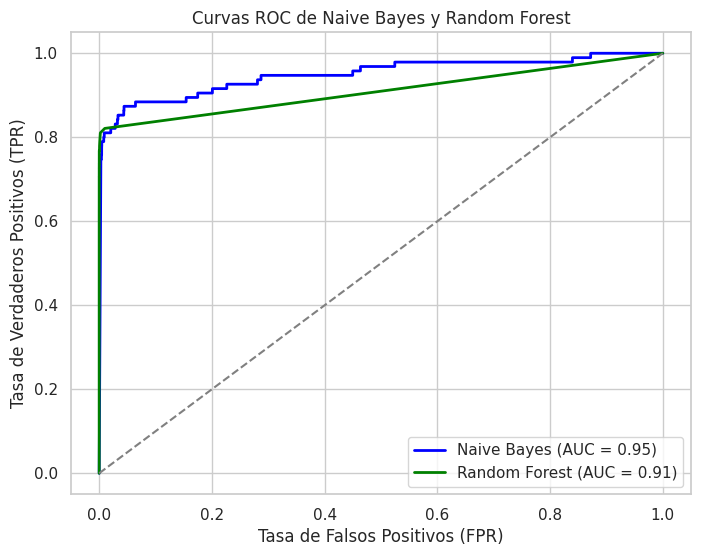

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer

# Asegúrate de que tus variables X_test_nueva, X_test_filtrada y sus respectivos y_test_nueva, y_test_filtrada estén definidas

# 1. Naive Bayes: Predecir probabilidades y calcular la curva ROC
naive = GaussianNB()
naive.fit(X_train_nueva, y_train_nueva)

# Obtener las probabilidades de predicción para la clase positiva (en este caso, asumo que la clase positiva es 1)
y_probs_naive = naive.predict_proba(X_test_nueva)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr_naive, tpr_naive, _ = roc_curve(y_test_nueva, y_probs_naive)
roc_auc_naive = auc(fpr_naive, tpr_naive)

# 2. Random Forest: Predecir probabilidades y calcular la curva ROC
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_nueva, y_train_nueva)

# Obtener las probabilidades de predicción para la clase positiva
y_probs_rf = rf.predict_proba(X_test_nueva)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr_rf, tpr_rf, _ = roc_curve(y_test_nueva, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 3. Graficar las curvas ROC
plt.figure(figsize=(8, 6))

# Curva ROC de Naive Bayes
plt.plot(fpr_naive, tpr_naive, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_naive)

# Curva ROC de Random Forest
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Curva ROC aleatoria (diagonal)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de Naive Bayes y Random Forest')
plt.legend(loc='lower right')

# Mostrar la gráfica
plt.show()


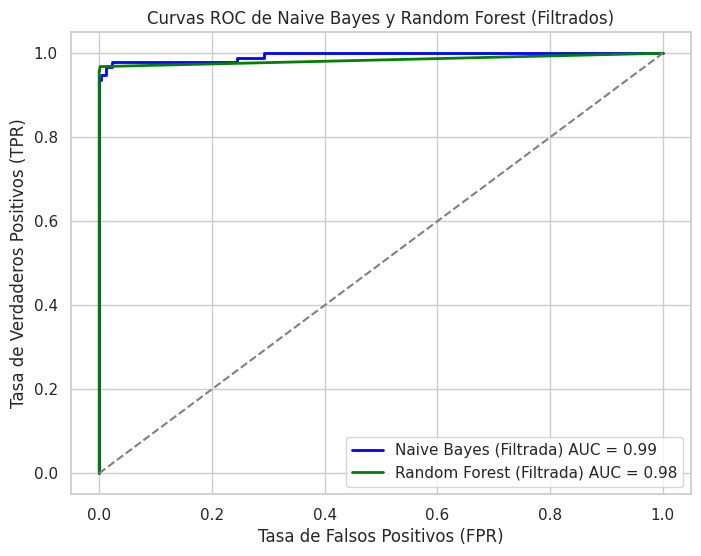

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# 1. Naive Bayes: Predecir probabilidades y calcular la curva ROC con datos filtrados
naive_filtrada = GaussianNB()
naive_filtrada.fit(X_train_filtrada, y_train_filtrada)

# Obtener las probabilidades de predicción para la clase positiva (en este caso, asumo que la clase positiva es 1)
y_probs_naive_filtrada = naive_filtrada.predict_proba(X_test_filtrada)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr_naive_filtrada, tpr_naive_filtrada, _ = roc_curve(y_test_filtrada, y_probs_naive_filtrada)
roc_auc_naive_filtrada = auc(fpr_naive_filtrada, tpr_naive_filtrada)

# 2. Random Forest: Predecir probabilidades y calcular la curva ROC con datos filtrados
rf_filtrada = RandomForestClassifier(n_estimators=50, random_state=42)
rf_filtrada.fit(X_train_filtrada, y_train_filtrada)

# Obtener las probabilidades de predicción para la clase positiva
y_probs_rf_filtrada = rf_filtrada.predict_proba(X_test_filtrada)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr_rf_filtrada, tpr_rf_filtrada, _ = roc_curve(y_test_filtrada, y_probs_rf_filtrada)
roc_auc_rf_filtrada = auc(fpr_rf_filtrada, tpr_rf_filtrada)

# 3. Graficar las curvas ROC
plt.figure(figsize=(8, 6))

# Curva ROC de Naive Bayes (Filtrada)
plt.plot(fpr_naive_filtrada, tpr_naive_filtrada, color='blue', lw=2, label='Naive Bayes (Filtrada) AUC = %0.2f' % roc_auc_naive_filtrada)

# Curva ROC de Random Forest (Filtrada)
plt.plot(fpr_rf_filtrada, tpr_rf_filtrada, color='green', lw=2, label='Random Forest (Filtrada) AUC = %0.2f' % roc_auc_rf_filtrada)

# Curva ROC aleatoria (diagonal)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de Naive Bayes y Random Forest (Filtrados)')
plt.legend(loc='lower right')

# Mostrar la gráfica
plt.show()


## **Precision de los datos de entrenamiento**

## **Precision de los datos de prueba**